In [1]:
import statsmodels.formula.api as smf
from statsmodels.graphics.api import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [94]:
df=pd.read_csv('delivery_time.csv')
df.head()

<IPython.core.display.Javascript object>

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [99]:
df=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [71]:
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.shape

(21, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

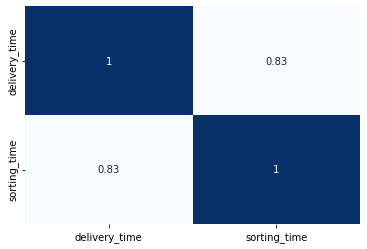

In [8]:
sns.heatmap(df.corr(),cmap='Blues',cbar=False,annot=True,fmt='.2g')

<IPython.core.display.Javascript object>

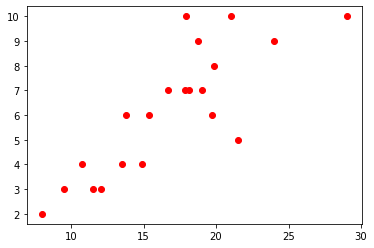

In [9]:
plt.scatter(df.delivery_time,df.sorting_time,color='red')

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

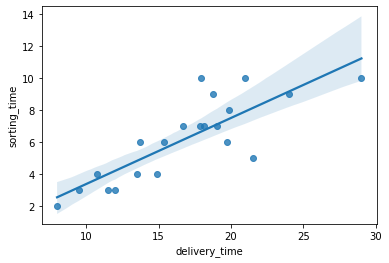

In [10]:
sns.regplot(df.delivery_time,df.sorting_time)

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

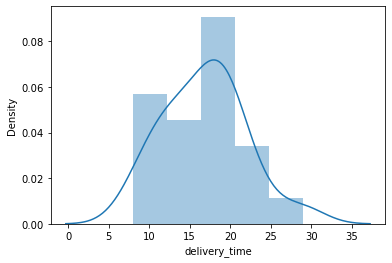

In [11]:
sns.distplot(df.delivery_time)

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

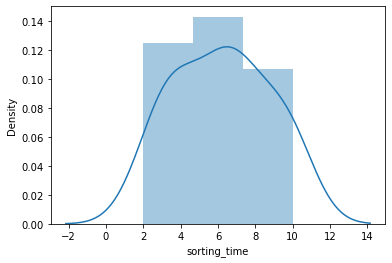

In [12]:
sns.distplot(df.sorting_time)

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

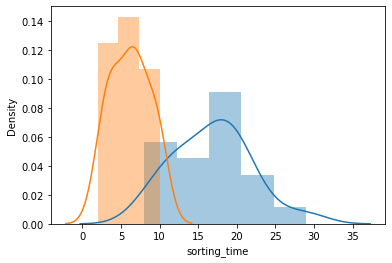

In [13]:
sns.distplot(df.delivery_time)
sns.distplot(df.sorting_time)

In [14]:
model=smf.ols('sorting_time~delivery_time',data=df).fit()

In [15]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        19:09:29   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [18]:
predictions=model.predict()


In [19]:
predictions

array([ 7.93194282,  4.82886561,  7.41476329,  9.17317371, 11.24189185,
        5.59429132,  7.10445557,  3.1738911 ,  6.64933758,  7.00101966,
        7.44786278,  3.69107064,  6.14457035,  4.00137836,  4.22066248,
        5.39983182,  4.93230152,  6.73622374,  2.55327566,  6.62037552,
        8.13881464])

In [20]:
df['pred_sorting_time']=predictions

In [21]:
df['residuals']=model.resid

In [22]:
df

,delivery_time,sorting_time,pred_sorting_time,residuals
0,21.00,10,7.931943,2.068057
1,13.50,4,4.828866,-0.828866
2,19.75,6,7.414763,-1.414763
3,24.00,9,9.173174,-0.173174
4,29.00,10,11.241892,-1.241892
5,15.35,6,5.594291,0.405709
6,19.00,7,7.104456,-0.104456
7,9.50,3,3.173891,-0.173891
8,17.90,10,6.649338,3.350662
9,18.75,9,7.001020,1.998980


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

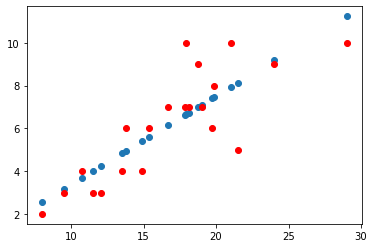

In [23]:
plt.scatter(df.delivery_time,df.pred_sorting_time)
plt.scatter(df.delivery_time,df.sorting_time,color='red')


In [24]:
x=df.delivery_time.values.reshape(21,1)
y=df.sorting_time.values.reshape(21,1)

In [25]:
lr=LinearRegression()
model1=lr.fit(x,y)

In [26]:
model1.coef_

array([[0.41374363]])

In [27]:
model1.intercept_

array([-0.75667337])

In [28]:
pred_lr=model1.predict(x)

In [29]:
pred_lr

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

In [30]:
df['pred_LR']=pred_lr

In [31]:
df

,delivery_time,sorting_time,pred_sorting_time,residuals,pred_LR
0,21.00,10,7.931943,2.068057,7.931943
1,13.50,4,4.828866,-0.828866,4.828866
2,19.75,6,7.414763,-1.414763,7.414763
3,24.00,9,9.173174,-0.173174,9.173174
4,29.00,10,11.241892,-1.241892,11.241892
5,15.35,6,5.594291,0.405709,5.594291
6,19.00,7,7.104456,-0.104456,7.104456
7,9.50,3,3.173891,-0.173891,3.173891
8,17.90,10,6.649338,3.350662,6.649338
9,18.75,9,7.001020,1.998980,7.001020


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

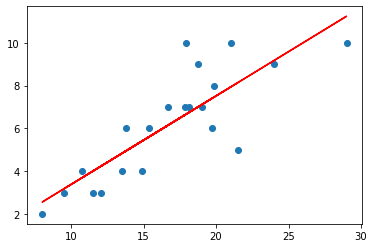

In [32]:
plt.scatter(x,y)
plt.plot(x,pred_lr,'-',color='red')

In [33]:
r2_score(y,pred_lr)

0.6822714748417231

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

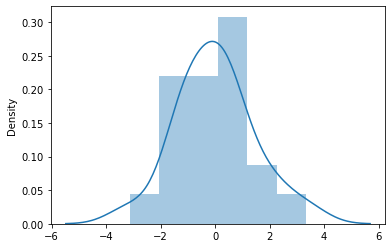

In [34]:
sns.distplot(model.resid)

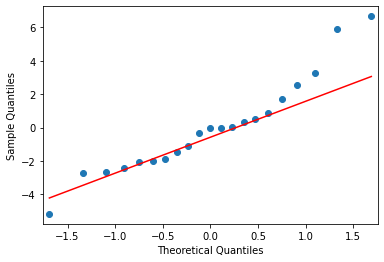

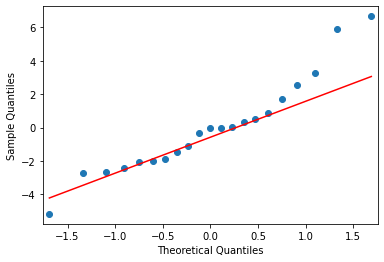

In [57]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')

In [35]:
model.resid.mean()

2.2838873649431793e-15

In [36]:
input_data=pd.DataFrame([20,25,31,26,16],columns=["delivery_time"])

<IPython.core.display.Javascript object>

In [37]:
input_data

,delivery_time
0,20
1,25
2,31
3,26
4,16


In [38]:
model1.predict(input_data)

C:\Users\OMKAR\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 7.51819919],
       [ 9.58691734],
       [12.0693791 ],
       [10.00066096],
       [ 5.86322468]])

In [39]:
model=smf.ols('delivery_time~sorting_time',data=df).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        19:09:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [42]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

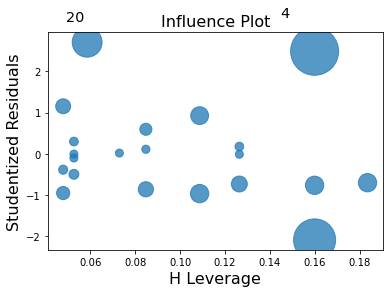

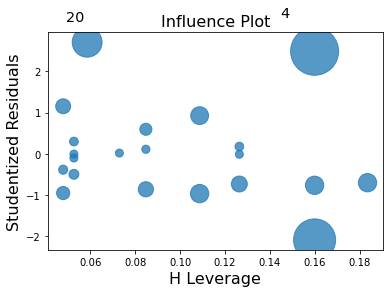

In [43]:
influence_plot(model)

In [44]:
leverage_cutoff=3*(2+1)/21
leverage_cutoff

0.42857142857142855

In [45]:
# the residuals are normally distributed with mean = 0
#all point lie with the leverage cutogg value which can be seen in influence plot

In [47]:
model2=smf.ols('sorting_time~np.log(delivery_time)',data=df).fit()
model2.rsquared

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7109478980584186

In [49]:
model3=smf.ols('np.log(sorting_time)~delivery_time',data=df).fit()
model3.rsquared

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6954434611324223

In [51]:
model3=smf.ols('sorting_time~delivery_time**2',data=df).fit()
model3.rsquared

0.6822714748417231

In [52]:
model4=smf.ols('sorting_time~delivery_time**3',data=df).fit()
model4.rsquared

0.6822714748417231

In [54]:
model5=smf.ols('sorting_time~np.sqrt(delivery_time)',data=df).fit()
model5.rsquared

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.704049871541756

In [72]:
df['delivery_time_reciprocal']=1/df['delivery_time']
df['delivery_time_recipro_sqr']=1/df['delivery_time']**2
df['delivery_time_recipro_cube']=1/df['delivery_time']**3



In [73]:
df.head()

,delivery_time,sorting_time,delivery_time_reciprocal,delivery_time_recipro_sqr,delivery_time_recipro_cube
0,21.00,10,0.047619,0.002268,0.000108
1,13.50,4,0.074074,0.005487,0.000406
2,19.75,6,0.050633,0.002564,0.000130
3,24.00,9,0.041667,0.001736,0.000072
4,29.00,10,0.034483,0.001189,0.000041


In [79]:
model6=smf.ols('sorting_time~delivery_time+np.log(delivery_time)',data=df).fit()
model6.rsquared

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7110162817970906

In [82]:
model_influence=model6.get_influence()
(c,_)=model_influence.cooks_distance
c

array([7.40389984e-02, 1.84620307e-02, 2.40514538e-08, 4.04032589e-02,
       2.07511097e+04, 3.27930577e-08, 4.65038867e-03, 4.15765375e-02,
       7.41394372e-02, 4.17173912e-02, 1.85486890e-02, 1.84620249e-02,
       4.65234132e-03, 4.15765379e-02, 4.15765382e-02, 1.84620490e-02,
       3.28865622e-08, 4.65166477e-03, 7.39467283e-02, 4.65188196e-03,
       4.61809226e-03])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(4, 20751.109690225683)

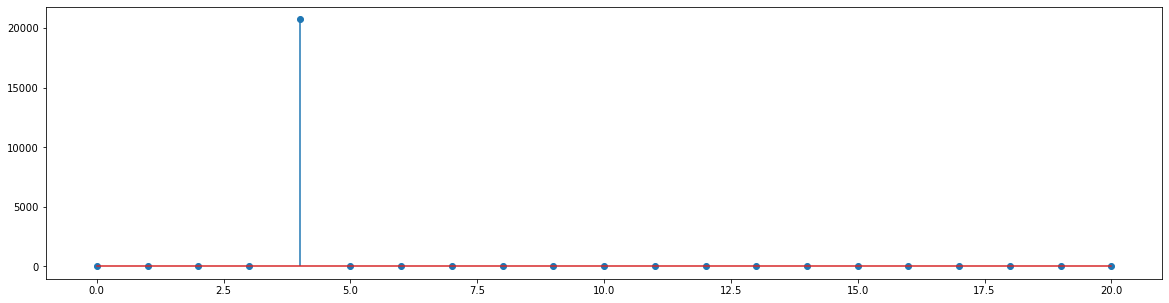

In [85]:
plt.figure(figsize=(20,5))
plt.stem(np.arange(len(df)),np.round(c,3))
np.argmax(c),np.max(c)

In [86]:
c[4]

20751.109690225683

In [95]:
df=df.drop(df.index[4],axis=0).reset_index()

In [96]:
df.shape

(20, 3)

In [97]:
df

,index,Delivery Time,Sorting Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6
5,6,19.00,7
6,7,9.50,3
7,8,17.90,10
8,9,18.75,9
9,10,19.83,8


In [103]:
model7=smf.ols('sorting_time~delivery_time+np.log(delivery_time)',data=df).fit()
model7.rsquared

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6727659143514773

In [ ]:
# the residuals are normally distributed with mean = 0
#all point lie with the leverage cutogg value which can be seen in influence plot
# after performing all boxcox trnsformations the rsquared value is increased from 0.68 to 0.71 (see model6)
